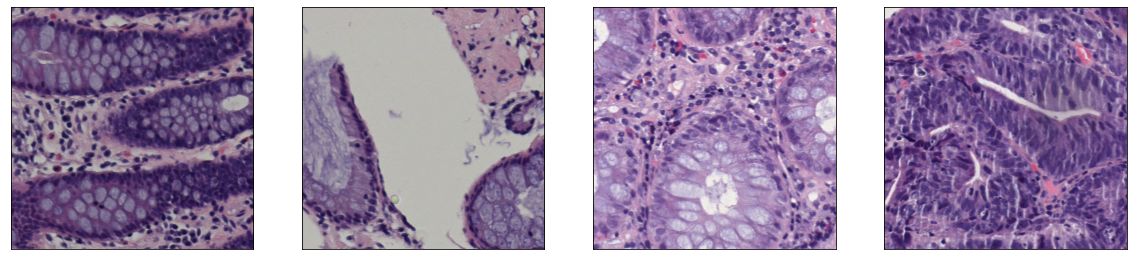

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras import models, layers, optimizers
import matplotlib.image as mpimg
import math
import tensorflow as tf
import os


BASE_DIR = '../input/chaoyangprocessed'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')
BATCH_SIZE = 32
EPOCHS = 100

#ImageDataGenerator for training data
TRAIN_DATAGEN = ImageDataGenerator(
                rescale = 1.0/255,
                validation_split = 0.2
                )

#ImageDataGenerator for testing data
TEST_DATAGEN = ImageDataGenerator(
                rescale = 1.0/255
                )

j=0
fig=plt.figure(figsize=(20, 20))
for i in os.listdir(TRAIN_DIR):
        img = mpimg.imread(TRAIN_DIR+"/"+i+"/"+os.listdir(TRAIN_DIR+"/"+i)[0])
        fig.add_subplot(1,4,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.xlabel(i,color='w')
        j += 1
plt.show()

In [3]:
print("TRAINING DATA:")
for i in os.listdir(TRAIN_DIR):
    files = os.listdir(TRAIN_DIR+"/"+i)
    print(f'{i} : {len(files)} files')
    
print("\n\nTEST DATA:")
for i in os.listdir(TEST_DIR):
    files = os.listdir(TEST_DIR+"/"+i)
    print(f'{i} : {len(files)} files')

TRAINING DATA:
serrated : 842 files
normal : 1111 files
adenoma : 664 files
adenocarcinoma : 1404 files


TEST DATA:
serrated : 321 files
normal : 705 files
adenoma : 273 files
adenocarcinoma : 840 files


In [4]:
train_generator = TRAIN_DATAGEN.flow_from_directory(
                    TRAIN_DIR,
                    target_size = (256,256),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical',
                    subset='training'
                  )

validation_generator = TRAIN_DATAGEN.flow_from_directory(
                    TRAIN_DIR,
                    target_size = (256,256),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical',
                    subset='validation'
                  )

test_generator = TEST_DATAGEN.flow_from_directory(
                    TEST_DIR,
                    target_size = (256,256),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical'
                  )

Found 3219 images belonging to 4 classes.
Found 802 images belonging to 4 classes.
Found 2139 images belonging to 4 classes.


In [5]:
conv_base = InceptionResNetV2(
                    weights = 'imagenet',
                    include_top = False,
                    input_shape = (256,256,3)
                 )

2022-10-16 19:09:07.451074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 19:09:07.544180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 19:09:07.544978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 19:09:07.546173: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

219070464/219055592 [==============================] - 1s 0us/step


In [6]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(240, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Nadam(learning_rate=2e-5), metrics=['acc'])

In [7]:
history = model.fit_generator(
                                train_generator,
                                steps_per_epoch = train_generator.samples // BATCH_SIZE,
                                epochs = EPOCHS,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.samples // BATCH_SIZE,
                             )

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-10-16 19:09:18.229873: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-16 19:10:01.553639: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 111s 607ms/step - loss: 1.1469 - acc: 0.5287 - val_loss: 0.9163 - val_acc: 0.6075
Epoch 2/100
100/100 [==============================] - 55s 545ms/step - loss: 0.6697 - acc: 0.7355 - val_loss: 0.8683 - val_acc: 0.6575
Epoch 3/100
100/100 [==============================] - 54s 539ms/step - loss: 0.4507 - acc: 0.8227 - val_loss: 0.8534 - val_acc: 0.6675
Epoch 4/100
100/100 [==============================] - 54s 540ms/step - loss: 0.3213 - acc: 0.8848 - val_loss: 0.9775 - val_acc: 0.6500
Epoch 5/100
100/100 [==============================] - 54s 542ms/step - loss: 0.2019 - acc: 0.9300 - val_loss: 1.0942 - val_acc: 0.6425
Epoch 6/100
100/100 [==============================] - 54s 537ms/step - loss: 0.1288 - acc: 0.9573 - val_loss: 1.1995 - val_acc: 0.6562
Epoch 7/100
100/100 [==============================] - 55s 545ms/step - loss: 0.0929 - acc: 0.9749 - val_loss: 1.2764 - val_acc: 0.6438
Epoch 8/100
100/100 [==============================] - 54s 

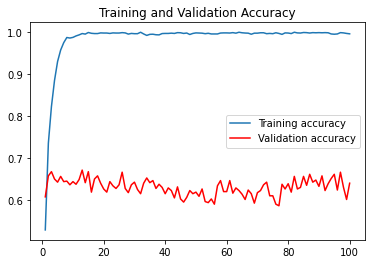

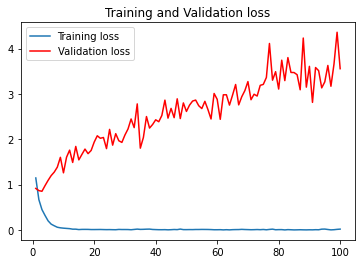

Average Validation accuracy:  0.6305000013113022
Average Validation loss:  2.5756030839681627


In [8]:
def plot_acc_loss(history):

    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_acc)+1)

    plt.plot(epochs, train_acc, label='Training accuracy')
    plt.plot(epochs, val_acc, label='Validation accuracy', color='red')
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, train_loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss', color='red')
    plt.title("Training and Validation loss")
    plt.legend()
    plt.show()

    print("Average Validation accuracy: ", np.mean(val_acc))
    print("Average Validation loss: ", np.mean(val_loss))

plot_acc_loss(history)